Author: Louis Owen (https://louisowen6.github.io/)

In [152]:
import pandas as pd
import numpy as np
import random
import re
import json
import ast

import matplotlib.pyplot as plt

from google_trans_new import google_translator

from nlp_id.postag import PosTag

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

from tqdm import tqdm

tqdm.pandas()

In [3]:
df = pd.read_csv('../data/en_ver/articles_data.tsv',sep='\t')

In [4]:
df.sample(5)

,category,author,publish_date,text,url,clean_text,len_chars
39,environment,['Oecd Environment Focus'],2020-02-04 00:00:00,"Carbon tax, emissions reduction and employment...",https://oecd-environment-focus.blog/2020/02/04...,"Carbon tax, emissions reduction and employment...",6659
66,biology,[],2021-05-21 00:00:00,Researchers have been able to prove for the fi...,https://www.sciencedaily.com/releases/2021/05/...,Researchers have been able to prove for the fi...,3903
46,technology,[],2021-05-21 00:00:00,"With the rise of the digital age, the amount o...",https://www.sciencedaily.com/releases/2021/05/...,"With the rise of the digital age, the amount o...",4533
2,history,"['View All Posts Followinghadrian', 'I Came', ...",2021-03-21 00:00:00,"In the early year of AD 121, Pompeia Plotina, ...",https://followinghadrian.com/2021/03/21/early-...,"In the early year of AD 121, Pompeia Plotina, ...",15718
71,chemistry,"['Maria Temming', 'Jake Buehler', 'Charles Q. ...",2021-01-05 11:00:00-05:00,Zinc-air batteries have a lot going for them. ...,https://www.sciencenews.org/article/zinc-air-b...,Zinc-air batteries have a lot going for them. ...,2100


In [5]:
paragraph_dict = {'category':{},'paragraph_1':{},'paragraph_2':{},'len_paragraph_1':{},'is_plagiarism':{},'plagiarism_type':{}}
idx = 0
for i in range(len(df)):
    for paragraph in df['clean_text'].iloc[i].split('\n'):
        paragraph = re.sub('\n','',paragraph)
        paragraph_list = paragraph.split('. ')
        length = len(paragraph_list)
        if (length>=2) and (len(paragraph)>150):            
            if length>4:
                paragraph_list_splitted = [paragraph_list[i:i + 2] for i in range(0, len(paragraph_list), 2)]
                
                for paragraph_list_splitted_i in paragraph_list_splitted:
                    print(str(len(paragraph_list_splitted_i)) + '|' + '. '.join(paragraph_list_splitted_i))
                    print()
                    paragraph_dict['category'][idx] = df['category'].iloc[i]
                    paragraph_dict['paragraph_1'][idx] = '. '.join(paragraph_list_splitted_i)
                    paragraph_dict['len_paragraph_1'][idx] = len(paragraph_list_splitted_i)

                    idx += 1
            else:
                print(str(length) + '|' + paragraph)
                print()
                paragraph_dict['category'][idx] = df['category'].iloc[i]
                paragraph_dict['paragraph_1'][idx] = paragraph
                paragraph_dict['len_paragraph_1'][idx] = length
            
                idx += 1

3|Shortly after celebrating Rome’s birthday (see here), Hadrian departed on his journey to the northern provinces and began his first extensive voyage through the empire. As he intended to be absent for a considerable time with little idea of the date in return, it was necessary to leave the control of Rome in trustworthy hands. He left Annius Verus, the grandfather of Marcus Aurelius, who was just born (see here), and his friend Turbo to look after the people and the senate.

3|After this he travelled  to the provinces of Gaul,  and came to the relief of all the communities with various acts of generosity, and from there he went over into Germany. HA Hadr. 10.1-2

2|So it seems that Hadrian headed to Gallia Narbonensis (southern France), then moved through Gallia Lugdunensis and from there went to Germany. He probably sailed from Ostia to Massilia (Marseille), southern Gaul’s main port, and proceeded up the Rhône River valley in the direction of Lugdunum (Lyon)

2|His entourage includ

2|Palestinian Central Bureau of Statistics (PCBS). (2006)

2|Registered Foreign Trade Statistics Goods and Services, 2018 Main Results (pp. 1–85)

1|http://www.pcbs.gov.ps/pcbs_2012/Publications.aspx

2|Palestinian Central Bureau of Statistics. (2009)

2|Economic Surveys Series, 2008 Main Results (pp. 1–144)

1|http://www.pcbs.gov.ps/pcbs_2012/Publications.aspx

2|Palestinian Central Bureau of Statistics. (2010)

2|Economic Surveys Series, 2009 Main Results (pp. 1–145)

1|http://www.pcbs.gov.ps/pcbs_2012/Publications.aspx

2|Palestinian Central Bureau of Statistics. (2011)

2|Economic Surveys Series, 2010 Main Results (pp. 1–182)

1|http://www.pcbs.gov.ps/pcbs_2012/Publications.aspx

2|Palestinian Central Bureau of Statistics. (2016)

2|Economic Surveys Series, 2015 Main Results (pp. 1–179)

1|http://www.pcbs.gov.ps/pcbs_2012/Publications.aspx

2|Palestinian Central Bureau of Statistics. (2017)

2|Economic Surveys Series, 2016 Main Results (pp. 1–183)

1|http://www.pcbs.gov.ps/pcbs_201


2|This may not always be the case, especially if the sanctioner regime is not liberal democratic. In the case of the OPEC oil embargo, for example, autocratic sanctioner regimes may not readily share what they know with their citizens.

4|There is yet to be a method of determining – beyond qualitative terms – the amount of clout MNCs have in a sanctioned economy. In South Africa, the sheer number of MNCs implied heavy MNC clout, but clout does not necessarily require numbers. In Rhodesia, while fewer MNCs were operating, the MNC oil monopoly in the Rhodesian market made them punch far above their weight in terms of importance to the national economy. The more MNCs control crucial resources, the more impact they have on the national economy.

4|In this model, a linear relationship was assumed between conspicuity and the actual punishment sustained by the corporations. This may not necessarily be the case. The government and the public may tolerate MNC misdemeanors to a point and only r

1|In the early 1400s, the explorer Cheng Ho embarked on seven voyages to the lands bordering the China Sea and the Indian Ocean, establishing China’s dominance throughout Southeast Asia.

3|Through the 13th-century travels of the Italian explorer Marco Polo, Europeans learned about the riches of China. Curiosity was awakened; a desire to trade with wealthy Asian cultures motivated a renewed interest in exploring the world. The period of time between the 15th and 17th centuries is known in the West as the Age of Exploration or the Age of Discovery.

3|With the dawn of the Age of Discovery, the study of geography regained popularity in Europe. The invention of the printing press in the mid-1400s helped spread geographic knowledge by making maps and charts widely available. Improvements in shipbuilding and navigation facilitated more exploring, greatly improving the accuracy of maps and geographic information.

3|Greater geographic understanding allowed European powers to extend their glo

2|Before the Industrial Revolution, naturally-occurring amounts of greenhouse gases caused the air near the surface to be about 33 °C (59 °F) warmer than it would have been in their absence. While water vapour (~50%) and clouds (~25%) are the biggest contributors to the greenhouse effect, they increase as a function of temperature and are therefore considered feedbacks

1|On the other hand, concentrations of gases such as CO

2|Human activity since the Industrial Revolution, mainly extracting and burning fossil fuels (coal, oil, and natural gas), has increased the amount of greenhouse gases in the atmosphere, resulting in a radiative imbalance. In 2018, the concentrations of CO

2|2 levels are much higher than they have been at any time during the last 800,000 years, the period for which reliable data have been collected from air trapped in ice cores. Less direct geological evidence indicates that CO

2|2 since 1880 have been caused by different sources ramping up one after another. Th

2|Second, none of the three authors subscribes to the popular theory that mental illness is caused by a chemical imbalance in the brain. As Whitaker tells the story, that theory had its genesis shortly after psychoactive drugs were introduced in the 1950s

2|The first was Thorazine (chlorpromazine), which was launched in 1954 as a “major tranquilizer” and quickly found widespread use in mental hospitals to calm psychotic patients, mainly those with schizophrenia. Thorazine was followed the next year by Miltown (meprobamate), sold as a “minor tranquilizer” to treat anxiety in outpatients

1|And in 1957, Marsilid (iproniazid) came on the market as a “psychic energizer” to treat depression.

2|In the space of three short years, then, drugs had become available to treat what at that time were regarded as the three major categories of mental illness—psychosis, anxiety, and depression—and the face of psychiatry was totally transformed. These drugs, however, had not initially been developed t

In [6]:
df_paragraph = pd.DataFrame(paragraph_dict)

In [7]:
df_paragraph

,category,paragraph_1,paragraph_2,len_paragraph_1,is_plagiarism,plagiarism_type
0,history,Shortly after celebrating Rome’s birthday (see...,NaN,3,NaN,NaN
1,history,After this he travelled to the provinces of G...,NaN,3,NaN,NaN
2,history,So it seems that Hadrian headed to Gallia Narb...,NaN,2,NaN,NaN
3,history,His entourage included the Guard Prefect Septi...,NaN,2,NaN,NaN
4,history,11.3). Hadrian would abruptly fire both men.,NaN,2,NaN,NaN
...,...,...,...,...,...,...
3469,chemistry,"In contrast, it took nearly five hours for the...",NaN,2,NaN,NaN
3470,chemistry,"aegypti, while it took the original spray over...",NaN,1,NaN,NaN
3471,chemistry,Although A. quadrimaculatus can carry the para...,NaN,3,NaN,NaN
3472,chemistry,"First, researchers need to test the new versio...",NaN,3,NaN,NaN


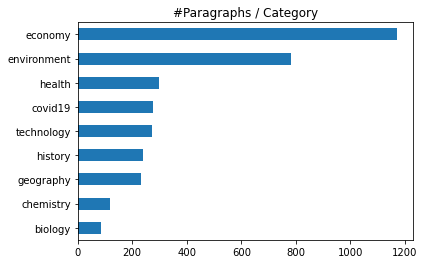

In [8]:
df_paragraph['category'].value_counts().sort_values().plot(kind='barh')
plt.title('#Paragraphs / Category')
plt.show()

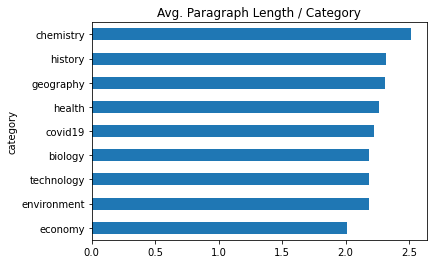

In [9]:
df_paragraph.groupby(['category']).mean()['len_paragraph_1'].sort_values().plot(kind='barh')
plt.title('Avg. Paragraph Length / Category')
plt.show()

# Plagiarism Type Assignment

In [133]:
random.seed(123)
idx_list = [i for i in range(len(df_paragraph))]
random.shuffle(idx_list)

In [134]:
plagiarism_idx_list = idx_list[:len(idx_list)//2]
non_plagiarism_idx_list = [x for x in idx_list if x not in plagiarism_idx_list]

literal_plagiarism_prop = int(0.13*len(plagiarism_idx_list))
partial_literal_plagiarism_prop = int(0.17*len(plagiarism_idx_list))
paraphrase_plagiarism_prop = int(0.3*len(plagiarism_idx_list))
structural_change_plagiarism_prop = int(0.35*len(plagiarism_idx_list))

literal_plagiarism_idx_list = plagiarism_idx_list[:literal_plagiarism_prop]
plagiarism_idx_list = [x for x in plagiarism_idx_list if x not in literal_plagiarism_idx_list]

partial_literal_plagiarism_idx_list = plagiarism_idx_list[:partial_literal_plagiarism_prop]
plagiarism_idx_list = [x for x in plagiarism_idx_list if x not in partial_literal_plagiarism_idx_list]

paraphrase_plagiarism_idx_list = plagiarism_idx_list[:paraphrase_plagiarism_prop]
plagiarism_idx_list = [x for x in plagiarism_idx_list if x not in paraphrase_plagiarism_idx_list]

structural_change_plagiarism_idx_list = plagiarism_idx_list[:structural_change_plagiarism_prop]

translated_plagiarism_idx_list = [x for x in plagiarism_idx_list if x not in structural_change_plagiarism_idx_list]

# Non-Plagiarism

In [12]:
random.seed(123)
for i in non_plagiarism_idx_list:
    category = df_paragraph.loc[i,'category']
    random_parapgraph = random.choice(df_paragraph[(df_paragraph.index!=i) & (df_paragraph['category']==category)]['paragraph_1'].to_list())
    df_paragraph.loc[i,'paragraph_2'] = random_parapgraph
    df_paragraph.loc[i,'is_plagiarism'] = False
    df_paragraph.loc[i,'plagiarism_type'] = 'non-plagiarism'

In [13]:
df_paragraph[df_paragraph['is_plagiarism']==False]

,category,paragraph_1,paragraph_2,len_paragraph_1,is_plagiarism,plagiarism_type
0,history,Shortly after celebrating Rome’s birthday (see...,"As a Hellenophile, Hadrian was familiar with t...",3,False,non-plagiarism
1,history,After this he travelled to the provinces of G...,La difficulté de datation des monuments: À pro...,3,False,non-plagiarism
3,history,His entourage included the Guard Prefect Septi...,"Greetings to Telephus, head gladiator instruct...",2,False,non-plagiarism
6,history,Lugdunum was the capital of these last three p...,Among the most important later sources for Epi...,2,False,non-plagiarism
9,history,Massilia played a major role in distributing M...,While these imitations of Egyptian styles and ...,4,False,non-plagiarism
...,...,...,...,...,...,...
3462,chemistry,The toxin deltamethrin is used around the worl...,One of the biggest bottlenecks in plastic recy...,2,False,non-plagiarism
3464,chemistry,Kahr’s team increased the potency of commercia...,False advertising Many plastic products are la...,2,False,non-plagiarism
3466,chemistry,Chemical bonds between deltamethrin molecules ...,"Plus, recycling breaks some of the chemical bo...",3,False,non-plagiarism
3471,chemistry,Although A. quadrimaculatus can carry the para...,“There’s not going to be a single technology t...,3,False,non-plagiarism


# Literal Plagiarism

In [14]:
for i in literal_plagiarism_idx_list:
    df_paragraph.loc[i,'paragraph_2'] = df_paragraph.loc[i,'paragraph_1']
    df_paragraph.loc[i,'is_plagiarism'] = True
    df_paragraph.loc[i,'plagiarism_type'] = 'literal'

In [15]:
df_paragraph[df_paragraph['plagiarism_type']=='literal']

,category,paragraph_1,paragraph_2,len_paragraph_1,is_plagiarism,plagiarism_type
33,history,"Thanks to a building inscription, we know that...","Thanks to a building inscription, we know that...",2,True,literal
48,history,Hadrian would then continue to the northern fr...,Hadrian would then continue to the northern fr...,4,True,literal
65,history,Marcus was originally named Marcus Annius Cati...,Marcus was originally named Marcus Annius Cati...,3,True,literal
67,history,"At his father’s death, Marcus was adopted by h...","At his father’s death, Marcus was adopted by h...",4,True,literal
87,history,"In 138, as his health had deteriorated steadil...","In 138, as his health had deteriorated steadil...",4,True,literal
...,...,...,...,...,...,...
3401,chemistry,The new compatibilizer molecule contains two s...,The new compatibilizer molecule contains two s...,2,True,literal
3416,chemistry,Otwell E. Otwell Source: V,Otwell E. Otwell Source: V,2,True,literal
3433,chemistry,Computer calculations showed that this behavio...,Computer calculations showed that this behavio...,3,True,literal
3463,chemistry,This form of deltamethrin may stand a better c...,This form of deltamethrin may stand a better c...,2,True,literal


# Partial Literal Plagiarism

In [16]:
for i in partial_literal_plagiarism_idx_list:
    try:
        splitted_par_1 = df_paragraph.loc[i,'paragraph_1'].split('. ')
        df_paragraph.loc[i,'paragraph_2'] = '. '.join(random.sample(splitted_par_1,max(1,len(splitted_par_1)//2)))
        df_paragraph.loc[i,'is_plagiarism'] = True
        df_paragraph.loc[i,'plagiarism_type'] = 'partial literal'
    except Exception as e:
        print(e)

In [17]:
df_paragraph[df_paragraph['plagiarism_type']=='partial literal']

,category,paragraph_1,paragraph_2,len_paragraph_1,is_plagiarism,plagiarism_type
2,history,So it seems that Hadrian headed to Gallia Narb...,So it seems that Hadrian headed to Gallia Narb...,2,True,partial literal
4,history,11.3). Hadrian would abruptly fire both men.,Hadrian would abruptly fire both men.,2,True,partial literal
19,history,That would have left him very little time to i...,That would have left him very little time to i...,1,True,partial literal
20,history,Lugdunum was founded as a Roman colony in 43 B...,Lugdunum was founded as a Roman colony in 43 B...,2,True,partial literal
25,history,The majority of Lugdunum’s public buildings we...,The majority of Lugdunum’s public buildings we...,2,True,partial literal
...,...,...,...,...,...,...
3453,chemistry,"Tiancun Xiao, a chemist at the University of O...",Other by-products included similar petrochemic...,4,True,partial literal
3460,chemistry,Limbut’s team used the Chilica-pod to individu...,"When translated to Scoville heat units, that r...",3,True,partial literal
3465,chemistry,The deltamethrin crystals in typical insectici...,The deltamethrin crystals in typical insectici...,3,True,partial literal
3470,chemistry,"aegypti, while it took the original spray over...","aegypti, while it took the original spray over...",1,True,partial literal


# Paraphrase Plagiarism

In [24]:
translator = google_translator()

In [19]:
for i in paraphrase_plagiarism_idx_list:
    en_trans = translator.translate(df_paragraph.loc[i,'paragraph_1'], lang_src="en", lang_tgt="id")
    df_paragraph.loc[i,'paragraph_2'] = translator.translate(en_trans, lang_src="id", lang_tgt="en")
    df_paragraph.loc[i,'is_plagiarism'] = True
    df_paragraph.loc[i,'plagiarism_type'] = 'paraphrase'

In [20]:
df_paragraph[df_paragraph['plagiarism_type']=='paraphrase']

,category,paragraph_1,paragraph_2,len_paragraph_1,is_plagiarism,plagiarism_type
7,history,"Unfortunately, his precise movements inside Ga...","Unfortunately, the exact movement in the slang...",2,True,paraphrase
12,history,The Rhodanus provided a significant channel fo...,Rhodanus provides a significant channel for co...,3,True,paraphrase
14,history,It is rather interesting to note that the fune...,It is rather interesting to note that the buri...,2,True,paraphrase
34,history,"During the reign of Hadrian, two tiers of seat...","During the reign of Hadrian, two levels of cha...",1,True,paraphrase
46,history,These marker stones must have been posted at r...,These spidol stones must have been posted regu...,1,True,paraphrase
...,...,...,...,...,...,...
3435,chemistry,Hydrogen bonds occur in a variety of substance...,"Hydrogen bonds occur in various substances, th...",2,True,paraphrase
3438,chemistry,Strong hydrogen bonds are thought to play a ro...,Strong hydrogen bonds are expected to play a r...,2,True,paraphrase
3455,chemistry,The device could someday be used to test cooke...,The device someday can be used to test cooked ...,2,True,paraphrase
3467,chemistry,The researchers tested the more potent version...,The researchers tested the stronger version of...,2,True,paraphrase


# Structural Change Plagiarism

**Passive to Active Voice Converter**: https://github.com/DanManN/pass2act

**Synonym Dictionary**: https://github.com/zaibacu/thesaurus

In [86]:
# !conda install pattern
# !pip install spacy

In [130]:
import spacy
import pattern.en as en

noundict = {'i':'me', 'we':'us', 'you':'you', 'he':'him', 'she':'her', 'they':'them', 'them':'they', 'her':'she', 'him':'he', 'us':'we', 'me':'i'}

def nouninv(noun):
    n = noun.lower()
    if n in noundict:
        return noundict[n]
    return noun

nlp = spacy.load('en_core_web_sm')

def pass2act(doc, rec=False):
    try:
        parse = nlp(doc)
        newdoc = ''
        for sent in parse.sents:

            # Init parts of sentence to capture:
            subjpass = ''
            subj = ''
            verb = ''
            verbaspect = ''
            verbtense = ''
            adverb = {'bef':'', 'aft':''}
            part = ''
            prep = ''
            agent = ''
            aplural = False
            advcltree = None
            aux = list(list(nlp('. .').sents)[0]) # start with 2 'null' elements
            xcomp = ''
            punc = '.'
            # Analyse dependency tree:
            for word in sent:
                if word.dep_ == 'advcl':
                    if word.head.dep_ in ('ROOT', 'auxpass'):
                        advcltree = word.subtree
                if word.dep_ == 'nsubjpass':
                    if word.head.dep_ == 'ROOT':
                        subjpass = ''.join(w.text_with_ws.lower() if w.tag_ not in ('NNP','NNPS') else w.text_with_ws for w in word.subtree).strip()
                if word.dep_ == 'nsubj':
                    subj = ''.join(w.text_with_ws.lower() if w.tag_ not in ('NNP','NNPS') else w.text_with_ws for w in word.subtree).strip()
                    if word.head.dep_ == 'auxpass':
                        if word.head.head.dep_ == 'ROOT':
                            subjpass = subj
                if word.dep_ in ('advmod','npadvmod','oprd'):
                    if word.head.dep_ == 'ROOT':
                        if verb == '':
                            adverb['bef'] = ''.join(w.text_with_ws.lower() if w.tag_ not in ('NNP','NNPS') else w.text_with_ws for w in word.subtree).strip()
                        else:
                            adverb['aft'] = ''.join(w.text_with_ws.lower() if w.tag_ not in ('NNP','NNPS') else w.text_with_ws for w in word.subtree).strip()
                if word.dep_ == 'auxpass':
                    if word.head.dep_ == 'ROOT':
                        if not subjpass:
                            subjpass = subj
                if word.dep_ in ('aux','auxpass','neg'):
                    if word.head.dep_ == 'ROOT':
                        aux += [word]
                if word.dep_ == 'ROOT':
                    verb = word.text
                    if word.tag_ == 'VB':
                        verbtense = en.INFINITIVE
                    elif word.tag_ == 'VBD':
                        verbtense = en.PAST
                    elif word.tag_ == 'VBG':
                        verbtense = en.PRESENT
                        verbaspect = en.PROGRESSIVE
                    elif word.tag_ == 'VBN':
                        verbtense = en.PAST
                    else:
                        verbtense = en.tenses(word.text)[0][0]
                if word.dep_ == 'prt':
                    if word.head.dep_ == 'ROOT':
                        part = ''.join(w.text_with_ws.lower() if w.tag_ not in ('NNP','NNPS') else w.text_with_ws for w in word.subtree).strip()
                if word.dep_ == 'prep':
                    if word.head.dep_ == 'ROOT':
                        prep = ''.join(w.text_with_ws.lower() if w.tag_ not in ('NNP','NNPS') else w.text_with_ws for w in word.subtree).strip()
                if word.dep_.endswith('obj'):
                    if word.head.dep_ == 'agent':
                        if word.head.head.dep_ == 'ROOT':
                            agent = ''.join(w.text + ', ' if w.dep_=='appos' else (w.text_with_ws.lower() if w.tag_ not in ('NNP','NNPS') else w.text_with_ws) for w in word.subtree).strip()
                            aplural = word.tag_ in ('NNS','NNPS')
                if word.dep_ in ('xcomp','ccomp','conj'):
                    if word.head.dep_ == 'ROOT':
                        xcomp = ''.join(w.text_with_ws.lower() if w.tag_ not in ('NNP','NNPS') else w.text_with_ws for w in word.subtree).strip()
                        that = xcomp.startswith('that')
                        xcomp = pass2act(xcomp, True).strip(' .')
                        if not xcomp.startswith('that') and that:
                            xcomp = 'that '+xcomp
                if word.dep_ == 'punct' and not rec:
                    if word.text != '"':
                        punc = word.text

            # exit if not passive:
            if subjpass == '':
                newdoc += str(sent) + ' '
                continue

            # if no agent is found:
            if agent == '':
                # what am I gonna do? BITconEEEEEEECT!!!!
                newdoc += str(sent) + ' '
                continue

            # invert nouns:
            agent = nouninv(agent)
            subjpass = nouninv(subjpass)

            # FUCKING CONJUGATION!!!!!!!!!!!!!:
            auxstr = ''
            num = en.SINGULAR if not aplural or agent in ('he','she') else en.PLURAL
            aux.append(aux[0])
            verbaspect = None
            for (pp, p, a, n) in zip(aux,aux[1:],aux[2:],aux[3:]):
                if a.lemma_ == '.':
                    continue

                if a.lemma_ == 'not':
                    if p.lemma_ == 'be':
                        if n.lemma_ == 'be':
                            verbtense = en.tenses(a.text)[0][0]
                            auxstr += en.conjugate('be',tense=en.tenses(p.text)[0][0],number=num) + ' '
                            verbaspect = en.PROGRESSIVE
                        else:
                            auxstr += en.conjugate('do',tense=en.tenses(p.text)[0][0],number=num) + ' '
                            verbtense = en.INFINITIVE
                    auxstr += 'not '
                elif a.lemma_ == 'be':
                    if p.lemma_ == 'be':
                        verbtense = en.tenses(a.text)[0][0]
                        auxstr += en.conjugate('be',tense=en.tenses(a.text)[0][0],number=num) + ' '
                        verbaspect = en.PROGRESSIVE
                    elif p.tag_ == 'MD':
                        verbtense = en.INFINITIVE
                elif a.lemma_ == 'have':
                    num == en.PLURAL if p.tag_ == 'MD' else num
                    auxstr += en.conjugate('have',tense=en.tenses(a.text)[0][0],number=num) + ' '
                    if n.lemma_ == 'be':
                        verbaspect = en.PROGRESSIVE
                        verbtense = en.tenses(n.text)[0][0]
                else:
                    auxstr += a.text_with_ws
            auxstr = auxstr.lower().strip()

            if verbaspect:
                verb = en.conjugate(verb,tense=verbtense,aspect=verbaspect)
            else:
                verb = en.conjugate(verb,tense=verbtense)

            advcl = ''
            if advcltree:
                for w in advcltree:
                    if w.pos_ == 'VERB' and en.tenses(w.text)[0][4] == en.PROGRESSIVE:
                        advcl += 'which ' + en.conjugate(w.text,tense=en.tenses(verb)[0][0]) + ' '
                    else:
                        advcl += w.text_with_ws

            newsent = ' '.join(list(filter(None, [agent,auxstr,adverb['bef'],verb,part,subjpass,adverb['aft'],advcl,prep,xcomp])))+punc
            if not rec:
                newsent = newsent[0].upper() + newsent[1:]
            newdoc += newsent + ' '
        return newdoc
    except:
        return doc

In [82]:
def synonym_swapper(sentence,rate=0.5):
    #Synonym swapping for each word
    random.seed(123)
    swapped = ' '.join([random.choice(synonym_dict[wrd.lower()]) if (random.uniform(0,1)<rate) and (wrd.lower() in synonym_dict) else wrd for wrd in sentence.split()])
    
    return swapped.strip()

In [127]:
#Load Synonym Dictionary
synonym_dict = {}
with open('../resources/en_ver/synonym_dict.jsonl','r') as f_in:
    for line in f_in:
        try:
            dict_ = ast.literal_eval(line)
            synonyms = dict_['synonyms']
            if len(synonyms)>0:
                if dict_['word'] not in synonym_dict:
                    synonym_dict[dict_['word']] = synonyms
                else:
                    for syn in synonyms:
                        synonym_dict[dict_['word']].append(syn)
        except Exception as e:
            print(e)

unexpected EOF while parsing (<unknown>, line 1)


In [128]:
synonym_swapper("However, the German frontier was probably his absolute goal. If that was the case, as argued by Birley (1997), there is no reason to believe that he stayed in Lugdunum over such a long period and that he continued to journey north towards the Rhine only in the spring of 122")

'However, the German frontier was belik his univocal goal. If that was the case, arsenic argued aside Birley (1997), there is no intellect to consider that he stayed in Lugdunum over such angstrom long period and that he continued to journey Union towards the Rhine only in the bounce of 122'

In [131]:
pass2act("The savannah is roamed by beautiful giraffes.")

'Beautiful giraffes roamed the savannah. '

In [139]:
# We don't need translated type of plagiarism for english 
structural_change_plagiarism_idx_list = structural_change_plagiarism_idx_list + translated_plagiarism_idx_list

r = re.compile(r'[{}]+'.format(re.escape('.,;')))

for i in structural_change_plagiarism_idx_list:
    try:
        text = df_paragraph.loc[i,'paragraph_1']
        swapped_text_list = []
        for sentence in r.split(text):
            if sentence!=' ':
                sentence = pass2act(sentence.strip())
                swapped_text_list.append(synonym_swapper(sentence))
        swapped_text = ' '.join(swapped_text_list)

        df_paragraph.loc[i,'paragraph_2'] = swapped_text
        df_paragraph.loc[i,'is_plagiarism'] = True
        df_paragraph.loc[i,'plagiarism_type'] = 'structural change'
    except Exception as e:
        print(e)

In [140]:
df_paragraph[df_paragraph['plagiarism_type']=='structural change']

,category,paragraph_1,paragraph_2,len_paragraph_1,is_plagiarism,plagiarism_type
5,history,"By the Hadrianic era, Gaul was already a rich ...",away the Hadrianic era Gaul was already letter...,2,True,structural change
8,history,This famous Greek colony of the Phocaeans foun...,This famous Greek Colony of the Phocaeans foun...,1,True,structural change
10,history,The Phocaean city also shone by its schools of...,The Phocaean urban center also shone past its ...,3,True,structural change
18,history,"However, the German frontier was probably his ...",However the German frontier was probably his a...,2,True,structural change
29,history,The cavea was made bigger with the addition of...,The cavea was ready-made big with the add-on o...,2,True,structural change
...,...,...,...,...,...,...
3440,chemistry,That newfound understanding of chemical bondin...,That new understanding of chemical soldering b...,3,True,structural change
3450,chemistry,A new iron-based catalyst converts carbon diox...,A new iron-based catalyst converts carbon copy...,3,True,structural change
3458,chemistry,"Enter the portable, smartphone-compatible Chil...",come in the take-away smartphone-compatible Ch...,4,True,structural change
3459,chemistry,The Chilica-pod registers that electrical acti...,The Chilica-pod registers that electrical natu...,2,True,structural change


In [141]:
df_paragraph.isnull().sum()

category           0
paragraph_1        0
paragraph_2        0
len_paragraph_1    0
is_plagiarism      0
plagiarism_type    0
dtype: int64

In [142]:
df_paragraph.to_csv('../data/en_ver/plagiarism_data.tsv',sep='\t',index=False)

# Data Preprocessing

In [158]:
def deEmojify(inputString):
	'''
	Function to remove emoji
	'''
	return inputString.encode('ascii', 'ignore').decode('ascii')


def preprocessing(paragraph):
    '''
    clean input sentence  
    '''
    http_pat = r'https?://[^ ]+'
    www_pat = r'www.[^ ]+'
    hashtag_pat = r'#[A-Za-z0-9_]+'
    linebreak_pat = r'\n'
    
    cleaned_sentence_list = []
    for sentence in paragraph.split('. '):
        #Remove Emoji
        stripped = deEmojify(sentence)

        #Remove url
        stripped = re.sub(http_pat, '', stripped)
        stripped = re.sub(www_pat, '', stripped)

        #Remove hashtag
        stripped = re.sub(hashtag_pat, '', stripped)

        #Remove Non Alphabet and Non Number Characters
        stripped = re.sub(' +',' ',re.sub(r'[^a-zA-Z-0-9]',' ',stripped)).strip()

        #Lowercase
        stripped = stripped.lower()

        #Remove Stopwords Before Stemming
        stripped = ' '.join([x for x in stripped.split() if x not in stopwords])

        #Stem each word
        stripped = ' '.join([stemmer.stem(x) for x in stripped.split()])

        #Remove Stopwords After Stemming
        stripped = ' '.join([x for x in stripped.split() if x not in stopwords])

        cleaned_sentence_list.append(re.sub(' +',' ',stripped).strip())
    
    return ' '.join(cleaned_sentence_list)

In [159]:
stopwords = []

with open('../resources/en_ver/freq_stopwords.txt','r') as f_in:
    for line in f_in:
        stopwords.append(re.sub('\n','',line))
        
with open('../resources/en_ver/nltk_stopwords.txt','r') as f_in:
    for line in f_in:
        stopwords.append(re.sub('\n','',line))

In [160]:
df_paragraph = pd.DataFrame(columns=['category','paragraph_1','paragraph_2','len_pargraph_1','is_plagiarism','plagiarism_type'])

with open('../data/en_ver/plagiarism_data.tsv','r') as f_in:
    for i,line in enumerate(f_in):
        if i>0:
            columns = line.split('\t')
            columns[-1] = re.sub('\n','',columns[-1])
            df_paragraph.loc[i] = columns

In [161]:
df_paragraph.sample(5)

,category,paragraph_1,paragraph_2,len_pargraph_1,is_plagiarism,plagiarism_type
2883,technology,There are currently 7.28 billion people on the...,This is a good thing: This is humbling,2,True,partial literal
2842,technology,Here is the first complicating fact about the ...,Here is the first complicating fact about the ...,2,True,partial literal
1200,economy,"A few years later, nonetheless, Brazil's boom ...",A few years later however Brazil's prosper tur...,2,True,structural change
2784,technology,"I am 34 years old, but sometimes I feel like M...",In total. On the whole internet,1,False,non-plagiarism
250,economy,"Hirschman, an economist. Despite its intuitive...",https://doi.org/10.1016/0305-750X(91)90205-V,2,False,non-plagiarism


In [162]:
df_paragraph['cleaned_paragraph_1'] = df_paragraph['paragraph_1'].progress_apply(lambda x: preprocessing(x))

100%|██████████| 3474/3474 [00:02<00:00, 1304.91it/s]


In [163]:
df_paragraph['cleaned_paragraph_2'] = df_paragraph['paragraph_2'].progress_apply(lambda x: preprocessing(x))

100%|██████████| 3474/3474 [00:02<00:00, 1433.90it/s]


# Training & Testing Data Split

In [164]:
df_paragraph = df_paragraph[~((df_paragraph['cleaned_paragraph_1']=='') | (df_paragraph['cleaned_paragraph_2']==''))].reset_index(drop=True)

In [165]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(df_paragraph,df_paragraph['plagiarism_type']):
    df_paragraph_train = df_paragraph.loc[train_index]
    df_paragraph_test = df_paragraph.loc[test_index]

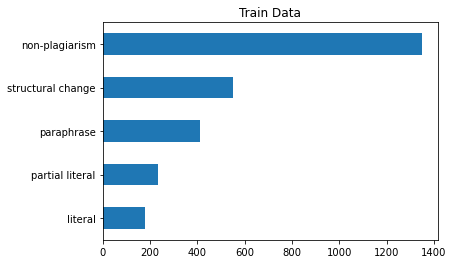

In [166]:
df_paragraph_train['plagiarism_type'].value_counts().sort_values().plot(kind='barh')
plt.title('Train Data')
plt.show()

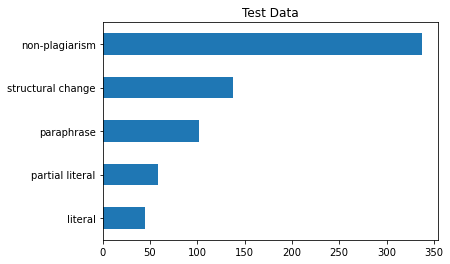

In [167]:
df_paragraph_test['plagiarism_type'].value_counts().sort_values().plot(kind='barh')
plt.title('Test Data')
plt.show()

In [168]:
df_paragraph_train

,category,paragraph_1,paragraph_2,len_pargraph_1,is_plagiarism,plagiarism_type,cleaned_paragraph_1,cleaned_paragraph_2
2650,technology,To enhance the energy harvesting ability of th...,"Foer saw Hughes as a “savior,” who could provi...",2,False,non-plagiarism,enhanc harvest abil technolog research look in...,foer saw hugh savior could provid addit cash i...
1054,economy,"""Second, the MNCs expected weak bargaining pow...",Recent studies have shown that the Japanese po...,2,False,non-plagiarism,second mnc expect weak bargain power negoti sk...,recent studi shown japanes popul propens spend...
1682,geography,Yet each sediment core only provides informati...,Yet apiece deposit marrow exclusive provides i...,3,True,structural change,yet sediment core provid inform one place eart...,yet apiec deposit marrow exclus provid inform ...
2462,environment,"In most developed countries, domestic waste di...",In almost improved countries domesticated wast...,3,True,structural change,develop countri domest dispos fund nation loca...,almost improv countri domest administr fund gr...
1941,environment,"Outside Europe, a diverse group of 20 or more ...","Outside Europe, a diverse group of 20 or more ...",1,True,paraphrase,outsid europ divers group 20 countri target re...,outsid europ divers group 20 countri target re...
...,...,...,...,...,...,...,...,...
2000,environment,Biofuels include a wide range of fuels which a...,The first two decades of the 21st century saw ...,2,False,non-plagiarism,biofuel includ wide rang fuel deriv biomass te...,first two decad 21st centuri saw increas adapt...
1954,environment,This practice can be traced back some 7000 yea...,Industrial biomass can be grown from numerous ...,2,False,non-plagiarism,practic trace back 7000 year ship persian gulf...,industri biomass grown numer type plant includ...
1513,covid19,"In conclusion, COVID-19 infection is a signifi...",A suggested algorithm for identification of va...,4,False,non-plagiarism,conclus covid-19 signific clinic problem nephr...,suggest algorithm identif vaccine-induc thromb...
536,economy,Containerization allows Palestinians to ship a...,Containerization allows Palestinians to ship v...,2,True,structural change,container allow palestinian ship larger number...,container allow palestinian ship vitamin large...


In [169]:
df_paragraph_test

,category,paragraph_1,paragraph_2,len_pargraph_1,is_plagiarism,plagiarism_type,cleaned_paragraph_1,cleaned_paragraph_2
2131,environment,Since renewable energy sources power density p...,"In developing countries, waste management acti...",2,False,non-plagiarism,sinc renew sourc power densiti per land area b...,develop countri manag activ usual carri poor s...
2760,technology,I attribute that not to the table but to the o...,I ascribe that not to the table simply to the ...,2,True,structural change,attribut tabl old build floor level,ascrib tabl simpli old construct floor non level
890,economy,In addition to promoting domestic entrepreneur...,The Brazilian Real had been severely depreciat...,2,False,non-plagiarism,addit promot domest entrepreneurship abe find ...,brazilian real sever depreci exchang rate us d...
2498,environment,The rate of pyrolysis increases with temperatu...,Pyrolysis levels increase with temperature. In...,2,True,paraphrase,rate pyrolysi increas temperatur industri appl...,pyrolysi level increas temperatur industri app...
1494,covid19,There was also a different diagnostic approach...,There are also different diagnostic approaches...,2,True,paraphrase,also differ diagnost approach 3 group among he...,also differ diagnost approach infect 3 group a...
...,...,...,...,...,...,...,...,...
2668,technology,"""It's impossible to say for certain when the i...","""It is impossible to say certain when the inte...",4,True,paraphrase,imposs say certain internet began mainli nobod...,imposs say certain internet start especi one a...
1887,environment,The ozone layer is contained within the strato...,The ozone bed is contained within the stratosp...,3,True,structural change,ozon layer contain within stratospher mainli l...,ozon bed contain within stratospher primarili ...
327,economy,"Figure 5: (A) Indonesia exports in 1970, (B) I...",Figure 5: (A) Indonesia exports in 1970 (B) In...,2,True,structural change,figur 5 indonesia export 1970 b indonesia expo...,figur 5 indonesia export 1970 b indonesia expo...
3351,chemistry,Chemistry students the world over are familiar...,The concept “tackles the challenge at the orig...,4,False,non-plagiarism,chemistri student world familiar coval bond bo...,concept tackl challeng origin rather tri put b...


In [170]:
df_paragraph_train.to_csv('../data/en_ver/plagiarism_data_train.tsv',sep='\t',index=False)

In [171]:
df_paragraph_test.to_csv('../data/en_ver/plagiarism_data_test.tsv',sep='\t',index=False)